# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [177]:
# Parameters
m = 1
A = 0.001#0.03375#0.03#0.1124921875#0.125
run = 1

1

In [178]:
res=m;
N=2.0^m*500.0#2.0^m*1000.0;#2.0^m*500.0;#N=2.0^m*500.0#2.0^m*100.0;
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0#100.0*2^m*10
Tf=Nt*dt; #final time
print(Tf)

1.0

In [179]:
print(N)

1000.0

In [180]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.001
dt =0.001
dx/dt =1.0


In [181]:
# Setting RESOLUTION

global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [182]:
ori=0.0;
initX1 = nothing
initX1=range(ori, stop=Xf, step=dx);

In [183]:
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
#T=range(0,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.001
the time step is 0.001


In [184]:
using Printf
include("./ScalarField.jl");

# Initial data of m β Ψ and Ψ,x

In [185]:
der_grid(initX)(initX)

1007-element Vector{Float64}:
 1.000000000000042
 1.0000000000000149
 0.9999999999999997
 0.9999999999999989
 1.0
 1.0000000000000002
 0.9999999999999997
 1.0000000000000004
 1.0000000000000002
 1.0000000000000004
 0.9999999999999999
 1.0000000000000004
 0.9999999999999992
 ⋮
 1.0000000000000184
 0.9999999999999907
 1.0000000000000373
 1.0000000000000098
 0.9999999999999815
 1.0000000000000278
 0.9999999999999999
 1.000000000000046
 1.0000000000000555
 0.9999999999993796
 0.9999999999968239
 0.999999999990667

In [186]:
using PyCall   
using Interpolations
using Dierckx


####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
"""for i in 4:L-3
    initderpsi[i]=Der(state_array[:,:],i,3,initX)
end

state_array[:,4] = initderpsi
state_array = ghost(state_array)"""

#new
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####


#psi_func = Spline1D(initX[4:L-3], state_array[4:L-3,3],  k=4)
derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4, bc="extrapolate");#new

#funcs = [psi_func, derpsi_func];

In [187]:
#m, beta, psi

dergrid_func=der_grid(initX)
funcs=[derpsi_func dergrid_func]
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX1,0,funcs);

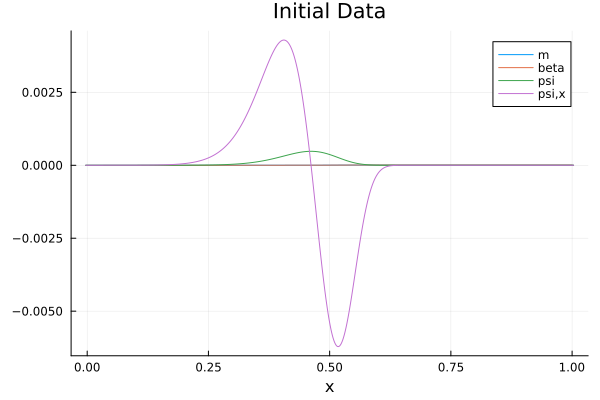

In [188]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX, state_array[:,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [189]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

open(dir*"/res$res/data.txt", "w") do file
    print_muninn(file, 0, state_array[:,1:5])
end

In [190]:
timestep=0
criticality=0.0
explode=0.0
evol_stats = [run criticality A sigma r0 timestep explode]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["run", "criticality", "A", "sigma", "r0", "timestep", "explode"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [191]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


 ## Time evolution

fixed grid

In [192]:
finaltime=0.3#5#3#1
stats,T_interp = timeevolution(state_array,finaltime,dir,dt,run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);

iteration 1 dt is 0.001, time of iteration is 0.001
iteration 2 dt is 0.001, time of iteration is 0.002
iteration 3 dt is 0.001, time of iteration is 0.003
iteration 4 dt is 0.001, time of iteration is 0.004
iteration 5 dt is 0.001, time of iteration is 0.005
iteration 6 dt is 0.001, time of iteration is 0.006
iteration 7 dt is 0.001, time of iteration is 0.007
iteration 8 dt is 0.001, time of iteration is 0.008
iteration 9 dt is 0.001, time of iteration is 0.009000000000000001
iteration 10 dt is 0.001, time of iteration is 0.010000000000000002
iteration 11 dt is 0.001, time of iteration is 0.011000000000000003
iteration 12 dt is 0.001, time of iteration is 0.012000000000000004
iteration 13 dt is 0.001, time of iteration is 0.013000000000000005
iteration 14 dt is 0.001, time of iteration is 0.014000000000000005
iteration 15 dt is 0.001, time of iteration is 0.015000000000000006
iteration 16 dt is 0.001, time of iteration is 0.016000000000000007
iteration 17 dt is 0.001, time of iterati

X is [-0.003, -0.002, -0.001, -0.01162787441637251, -0.010604501291685404, -0.009581151941819422, -0.008557826366242537, -0.007534524564089038, -0.006511246534026856, -0.005487992275540554, -0.004464761787888929, -0.003441555070292816, -0.0024183721219694803, -0.0013952129421366168, -0.00037207752999206885, 0.0006510341152701444, 0.0016741219944331276, 0.0026971861082854616, 0.0037202264576189754, 0.004743243043225611, 0.00576623586589732, 0.0067892049264260375, 0.007812150225603663, 0.008835071764222095, 0.00985796954307316, 0.010880843562948665, 0.01190369382464039, 0.01292652032894009, 0.013949323076639463, 0.014972102068530177, 0.015994857305403898, 0.017017588788052217, 0.018040296517266696, 0.01906298049383888, 0.020085640718560293, 0.021108277192222386, 0.022130889915616583, 0.023153478889534316, 0.024176044114766922, 0.025198585592105745, 0.026221103322342083, 0.0272435973062672, 0.028266067544672327, 0.02928851403834867, 0.030310936788087366, 0.03133333579467954, 0.03235571105

, 1.0019999540002793, 1.0029998965017652]
iteration 24 dt is 0.001, time of iteration is 0.024000000000000014


X is [-0.003, -0.002, -0.001, -0.012139569894520603, -0.011115162020700913, -0.010090778992997509, -0.009066420810804839, -0.008042087473183333, -0.0070177789787266, -0.005993495326845709, -0.0049692365167257405, -0.003945002547513779, -0.002920793418353343, -0.0018966091283884, -0.0008724496767432213, 0.00015168493746320788, 0.0011757947150856226, 0.0021998796569875317, 0.0032239397640343587, 0.004247975037091752, 0.005271985477025376, 0.00629597108470088, 0.007319931860983871, 0.008343867806739952, 0.00936777892283465, 0.010391665210133462, 0.011415526669501862, 0.01243936330180529, 0.013463175107909118, 0.014486962088678694, 0.015510724244979353, 0.016534461577676348, 0.017558174087634906, 0.018581861775720222, 0.01960552464279747, 0.02062916268973175, 0.021652775917388126, 0.02267636432663166, 0.023699927918327323, 0.024723466693340083, 0.025746980652534855, 0.026770469796776525, 0.027793934126929928, 0.02881737364385988, 0.029840788348431117, 0.030864178241508358, 0.03188754332395

iteration 25 dt is 0.001, time of iteration is 0.025000000000000015


X is [-0.003, -0.002, -0.001, -0.012651783148993736, -0.011626338956134987, -0.010600920683900849, -0.009575528331608803, -0.008550161898241981, -0.007524821382316227, -0.006499506783165678, -0.0054742180998982575, -0.004448955331583862, -0.003423718477288826, -0.002398507536079945, -0.0013733225070043588, -0.0003481633891021245, 0.000676969818552859, 0.0017020771169078456, 0.0027271585069031084, 0.003752213989481371, 0.004777243565585433, 0.005802247236158088, 0.006827225002142079, 0.00785217686448015, 0.008877102824114953, 0.009902002881989117, 0.010926877039045234, 0.011951725296225858, 0.012976547654473475, 0.014001344114730535, 0.015026114677939472, 0.016050859345042637, 0.01707557811698234, 0.018100270994700865, 0.019124937979140458, 0.020149579071243293, 0.021174194271951503, 0.02219878358220721, 0.023223347002952442, 0.024247884535129216, 0.025272396179679493, 0.026296881937545195, 0.0273213418096682, 0.028345775796990345, 0.029370183900453393, 0.03039456612099908, 0.0314189224

0.5191274649537695, 0.5201395057544838, 0.5211515211210567, 0.5221635110544612, 0.5231754755556707, 0.5241874146256584, 0.5251993282653956, 0.5262112164758528, 0.527223079258, 0.5282349166128063, 0.5292467285412381, 0.5302585150442625, 0.5312702761228436, 0.5322820117779438, 0.5332937220105255, 0.5343054068215487, 0.5353170662119711, 0.5363287001827496, 0.5373403087348384, 0.5383518918691909, 0.5393634495867577, 0.5403749818884888, 0.5413864887753314, 0.5423979702482314, 0.5434094263081325, 0.5444208569559769, 0.545432262192705, 0.546443642019256, 0.5474549964365663, 0.5484663254455713, 0.5494776290472054, 0.5504889072424007, 0.5515001600320875, 0.5525113874171952, 0.5535225893986516, 0.5545337659773842, 0.5555449171543174, 0.5565560429303755, 0.5575671433064814, 0.5585782182835572, 0.5595892678625233, 0.5606002920442994, 0.5616112908298051, 0.5626222642199576, 0.563633212215675, 0.564644134817873, 0.5656550320274679, 0.5666659038453742, 0.5676767502725069, 0.5686875713097795, 0.569698

X is [-0.003, -0.002, -0.001, -0.013164514965951155, -0.012138032880969884, -0.011111577794344423, -0.010085149705311828, -0.009058748612774468, -0.008032374515166966, -0.007006027411743065, -0.005979707301530075, -0.0049534141835172445, -0.003927148056690265, -0.0029009089200353055, -0.0018746967725188964, -0.0008485116131009774, 0.00017764655922833394, 0.0012037777454920926, 0.002229881946713743, 0.0032559591639163845, 0.004282009398123392, 0.005308032650358148, 0.0063340289216439905, 0.007359998213004248, 0.00838594052546216, 0.00941185586004093, 0.01043774421776372, 0.011463605599653657, 0.012489440006733781, 0.0135152474400271, 0.014541027900556594, 0.01556678138934516, 0.016592507907415645, 0.017618207455790857, 0.018643880035493575, 0.019669525647546492, 0.02069514429297225, 0.021720735972793476, 0.022746300688032708, 0.023771838439712454, 0.02479734922885516, 0.02582283305648324, 0.026848289923619043, 0.027873719831284886, 0.028899122780502988, 0.02992449877229555, 0.0309498478

 0.5200243722347717, 0.521036872712173, 0.5220493467200952, 0.523061794259591, 0.5240742153317136, 0.525086609937514, 0.5260989780780421, 0.5271113197543474, 0.5281236349674785, 0.5291359237184811, 0.5301481860084014, 0.5311604218382828, 0.5321726312091668, 0.5331848141220947, 0.5341969705781054, 0.5352091005782355, 0.5362212041235204, 0.5372332812149931, 0.5382453318536856, 0.539257356040627, 0.5402693537768454, 0.5412813250633666, 0.5422932699012146, 0.5433051882914113, 0.5443170802349769, 0.5453289457329301, 0.5463407847862877, 0.5473525973960641, 0.5483643835632727, 0.5493761432889254, 0.550387876574032, 0.5513995834196005, 0.5524112638266381, 0.5534229177961499, 0.5544345453291409, 0.5554461464266132, 0.5564577210895681, 0.5574692693190062, 0.5584807911159269, 0.5594922864813276, 0.5605037554162058, 0.5615151979215579, 0.5625266139983786, 0.5635380036476627, 0.5645493668704037, 0.5655607036675947, 0.5665720140402273, 0.5675832979892936, 0.5685945555157845, 0.5696057866206902, 0.57

iteration 27 dt is 0.001, time of iteration is 0.027000000000000017


X is [-0.003, -0.002, -0.001, -0.01367776613314425, -0.012650244579771965, -0.011622751105719309, -0.010595285710139433, -0.009567848391850464, -0.008540439149202321, -0.007513057981364875, -0.006485704887281342, -0.005458379865856848, -0.004431082915992961, -0.003403814036591753, -0.00237657322653566, -0.0013493604847007188, -0.0003221758099868976, 0.0007049807986757854, 0.0017321093424502272, 0.0027592098224210266, 0.003786282239694669, 0.0048133265953783895, 0.005840342890579515, 0.006867331126405402, 0.007894291303963328, 0.008921223424360539, 0.009948127488704233, 0.010975003498101567, 0.012001851453659616, 0.013028671356485404, 0.014055463207685932, 0.015082227008368103, 0.016108962759638773, 0.01713567046260474, 0.018162350118372788, 0.019189001728049583, 0.02021562529274175, 0.021242220813555892, 0.022268788291598507, 0.023295327727976066, 0.024321839123794972, 0.02534832248016158, 0.026374777798182182, 0.027401205078963032, 0.02842760432361027, 0.029453975533230026, 0.03048031

iteration 28 dt is 0.001, time of iteration is 0.028000000000000018


X is [-0.003, -0.002, -0.001, -0.014191537439920592, -0.0131629748386957, -0.012134441400996664, -0.011105937125889217, -0.010077462012103749, -0.009049016057901971, -0.008020599262366385, -0.006992211624352614, -0.005963853142678157, -0.00493552381615697, -0.003907223643603526, -0.002878952623812665, -0.0018507107555729412, -0.0008224980376994335, 0.0002056855310038012, 0.0012338399517123522, 0.0022619652256431876, 0.003290061353986038, 0.0043181283379350585, 0.005346166178684948, 0.006374174877430543, 0.007402154435366633, 0.008430104853687982, 0.009458026133589313, 0.010485918276265303, 0.011513781282910543, 0.012541615154719566, 0.013569419892886878, 0.014597195498606882, 0.015624941973073923, 0.016652659317482287, 0.01768034753302623, 0.018708006620899897, 0.019735636582297367, 0.020763237418412715, 0.02179080913043988, 0.022818351719572777, 0.02384586518700525, 0.02487334953393108, 0.025900804761543984, 0.026928230871037632, 0.027955627863605573, 0.02898299574044134, 0.0300103345

iteration 29 dt is 0.001, time of iteration is 0.02900000000000002


X is [-0.003, -0.002, -0.001, -0.014705829677227967, -0.013676224445487698, -0.012646649464731718, -0.011617104733934831, -0.010587590251736162, -0.009558106016305698, -0.008528652026635048, -0.00749922828148872, -0.006469834779593071, -0.0054404715196709275, -0.004411138500445639, -0.0033818357206209263, -0.0023525631788943006, -0.0013233208739905963, -0.00029410880460015523, 0.0007350730304137336, 0.0017642246325477373, 0.002793346003007541, 0.003822437143074766, 0.0048514980540343595, 0.005880528737171929, 0.0069095291937731895, 0.007938499425123893, 0.008967439432509767, 0.009996349217216503, 0.01102522878052971, 0.012054078123734933, 0.013082897248117686, 0.014111686154963374, 0.01514044484555734, 0.016169173321184862, 0.017197871583131175, 0.018226539632681404, 0.0192551774711206, 0.02028378509973379, 0.021312362519805873, 0.022340909732621716, 0.023369426739466095, 0.02439791354162373, 0.025426370140379257, 0.026454796537017267, 0.02748319273282222, 0.02851155872907855, 0.029539

iteration 30 dt is 0.001, time of iteration is 0.03000000000000002


X is [-0.003, -0.002, -0.001, -0.015220643637618443, -0.014189994189490726, -0.01315937608306779, -0.012128789317229967, -0.011098233890521576, -0.010067709801017335, -0.009037217047614418, -0.008006755628982684, -0.006976325543753807, -0.005945926790555944, -0.0049155593680177785, -0.0038852232747483752, -0.0028549185093506534, -0.001824645070455226, -0.000794402956663942, 0.00023580783330286344, 0.0012659873009548362, 0.0022961354476367657, 0.003326252274721345, 0.004356337783587595, 0.005386391975615552, 0.006416414852185455, 0.007446406414677606, 0.008476366664472292, 0.009506295602949766, 0.010536193231490186, 0.011566059551473646, 0.012595894564280204, 0.013625698271289798, 0.014655470673882297, 0.0156852117734375, 0.01671492157133515, 0.017744600068954876, 0.01877424726767623, 0.019803863168878718, 0.020833447773941725, 0.021863001084244583, 0.022892523101166535, 0.023922013826086757, 0.024951473260384334, 0.02598090140543829, 0.02701029826262752, 0.028039663833330883, 0.0290689

X is [-0.003, -0.002, -0.001, -0.015735980115252433, -0.014704284861647765, -0.013672622043740307, -0.012640991660312356, -0.011609393709809866, -0.010577828190208718, -0.009546295100308097, -0.008514794438679646, -0.007483326203856802, -0.0064518903943694885, -0.0054204870087481765, -0.004389116045503717, -0.003357777503140892, -0.00232647138019239, -0.001295197675163597, -0.00026395638664745405, 0.0007672524868938166, 0.0017984289469632935, 0.002829572995016068, 0.0038606846325284277, 0.004891763860978346, 0.005922810681844131, 0.006953825096604187, 0.007984807106736911, 0.009015756713720666, 0.010046673919033713, 0.011077558724154248, 0.012108411130560416, 0.01313923113973024, 0.014170018753141665, 0.015200773972272553, 0.016231496798600708, 0.017262187233603808, 0.01829284527875944, 0.019323470935545154, 0.02035406420543835, 0.021384625089916377, 0.022415153590456482, 0.023445649708535847, 0.024476113445631536, 0.02550654480322056, 0.02653694378277978, 0.02756731038578602, 0.028597

 0.7762266041811453, 0.7772335364311984, 0.7782404373694964, 0.7792473069974494, 0.7802541453164664, 0.7812609523279586, 0.7822677280333337, 0.7832744724340023, 0.7842811855313746, 0.7852878673268591, 0.786294517821865, 0.787301137017803, 0.7883077249160808, 0.7893142815181082, 0.7903208068252949, 0.7913273008390491, 0.7923337635607807, 0.7933401949918977, 0.7943465951338096, 0.7953529639879251, 0.7963593015556527, 0.7973656078384014, 0.7983718828375795, 0.7993781265545956, 0.8003843389908586, 0.8013905201477766, 0.8023966700267572, 0.8034027886292103, 0.8044088759565424, 0.8054149320101627, 0.8064209567914792, 0.8074269503018991, 0.8084329125428313, 0.8094388435156834, 0.8104447432218627, 0.811450611662778, 0.8124564488398357, 0.8134622547544438, 0.8144680294080098, 0.8154737728019418, 0.8164794849376465, 0.8174851658165316, 0.8184908154400045, 0.8194964338094712, 0.8205020209263396, 0.8215075767920177, 0.8225131014079109, 0.823518594775427, 0.8245240568959721, 0.8255294877709541, 0.8

X is [-0.003, -0.002, -0.001, -0.01625183990590278, -0.01521909725450606, -0.014186388136080834, -0.013153712549307767, -0.012121070492530884, -0.011088461963623628, -0.010055886961283627, -0.00902334548398072, -0.007990837530146535, -0.006958363098209174, -0.005925922186597337, -0.004893514793720081, -0.003861140917980479, -0.0028288005578097123, -0.0017964937116126101, -0.0007642203779003251, 0.00026801944505503285, 0.0013002257587431923, 0.0023323985647739865, 0.0033645378647217997, 0.004396643660165778, 0.00542871595268577, 0.006460754743861818, 0.007492760035273983, 0.0085247318285023, 0.009556670125126702, 0.01058857492672705, 0.011620446234883144, 0.01265228405117466, 0.013684088377181184, 0.014715859214482213, 0.015747596564657174, 0.016779300429285358, 0.017810970809945963, 0.01884260770821813, 0.019874211125680854, 0.020905781063913057, 0.021937317524493558, 0.022968820509001096, 0.024000290019014287, 0.025031726056111682, 0.02606312862187168, 0.02709449771787262, 0.028125833

]
iteration 33 dt is 0.001, time of iteration is 0.03300000000000002


X is [-0.003, -0.002, -0.001, -0.016768223806958846, -0.015734432162221184, -0.014700675151021093, -0.013666952771934015, -0.012633265023198415, -0.011599611902581726, -0.010565993408676394, -0.009532409539846867, -0.008498860294419345, -0.007465345670716537, -0.006431865667061752, -0.005398420281758675, -0.004365009513105051, -0.003331633359426993, -0.0022982918190248155, -0.001264984890309981, -0.00023171257136492317, 0.0008015251391977267, 0.001834728243278939, 0.002867896742507761, 0.00390103063856543, 0.0049341299331363, 0.00596719462790542, 0.0070002247245580206, 0.00803322022477935, 0.009066181130254576, 0.010099107442668795, 0.01113199916370705, 0.012164856295054245, 0.013197678838395194, 0.01423046679541461, 0.015263220167797128, 0.01629593895722724, 0.017328623165389336, 0.018361272793967733, 0.0193938878446466, 0.020426468319110023, 0.02145901421904197, 0.022491525546126323, 0.02352400230204683, 0.02455644448848716, 0.025588852107130834, 0.026621225159661286, 0.0276535636477

, 0.9799933977818936, 0.9809940415934393, 0.9819946523743609, 0.982995230126242, 0.9839957748506689, 0.9849962865492241, 0.9859967652234917, 0.9869972108750569, 0.987997623505503, 0.9889980031164137, 0.989998349709373, 0.9909986632859645, 0.9919989438477718, 0.9929991913963787, 0.9939994059333679, 0.9949995874603232, 0.9959997359788277, 0.9969998514904649, 0.9979999339968175, 0.9989999834994682, 1.0, 1.0009999834999959, 1.0019999340010388, 1.002999851504712]
iteration 34 dt is 0.001, time of iteration is 0.03400000000000002


X is [-0.003, -0.002, -0.001, -0.017285132617430626, -0.016250290380561132, -0.015215483881097046, -0.014180713117504996, -0.01314597808791423, -0.012111278789982576, -0.011076615222193643, -0.010041987382802896, -0.009007395270027462, -0.007972838882081059, -0.006938318217177964, -0.005903833273512888, -0.004869384049274632, -0.003834970542680611, -0.002800592751922756, -0.0017662506753065503, -0.0007319443108624241, 0.0003023263432956521, 0.0013365612885523422, 0.0023707605269681084, 0.0034049240603127116, 0.004439051890376082, 0.00547314401895116, 0.006507200447831667, 0.007541221178811541, 0.008575206213684718, 0.009609155554245106, 0.010643069202286564, 0.011676947159602826, 0.012710789427987526, 0.013744596009234191, 0.014778366905136271, 0.01581210211748706, 0.016845801648079736, 0.017879465498707402, 0.018913093671163006, 0.01994668616723939, 0.020980242988729282, 0.022013764137425302, 0.023047249615119936, 0.024080699423605575, 0.02511411356467445, 0.026147492040118698, 0.0271

 0.9809938609770751, 0.9819944902752719, 0.9829950855426276, 0.9839956467808277, 0.984996173991554, 0.9859966671764896, 0.9869971263373187, 0.9879975514757239, 0.9889979425933878, 0.9899982996919934, 0.9909986227732237, 0.9919989118387609, 0.9929991668902882, 0.9939993879294872, 0.9949995749580408, 0.9959997279776309, 0.9969998469899402, 0.9979999319966503, 0.9989999829994428, 1.0, 1.0009999830000038, 1.0019999320011364, 1.0029998470050798]
iteration 35 dt is 0.001, time of iteration is 0.035000000000000024


X is [-0.003, -0.002, -0.001, -0.01780256713795286, -0.01676667270691041, -0.015730815120453004, -0.014694994376934788, -0.01365921047437219, -0.01262346341030974, -0.011587753183118608, -0.010552079790941601, -0.009516443231883168, -0.008480843504044364, -0.007445280605526834, -0.006409754534412669, -0.005374265288778135, -0.0043388128667282725, -0.0033033972663430835, -0.002268018485817815, -0.001232676523085697, -0.0001973713759493862, 0.0008378969566691176, 0.0018731284772575054, 0.0029083231876298864, 0.003943481089684059, 0.004978602185324367, 0.0060136864764566466, 0.007048733964987174, 0.008083744652822302, 0.009118718541868388, 0.010153655634031748, 0.011188555931218577, 0.012223419435334962, 0.013258246148286882, 0.014293036071980224, 0.015327789208320714, 0.016362505559213952, 0.017397185126565448, 0.018431827912280555, 0.019466433918264497, 0.02050100314642239, 0.021535535598659207, 0.022570031276879805, 0.023604490182988908, 0.024638912318891086, 0.025673297686490796, 0.02

iteration 36 dt is 0.001, time of iteration is 0.036000000000000025


X is [-0.003, -0.002, -0.001, -0.018320528170789163, -0.017283579940274147, -0.01624666966484568, -0.015209797342741697, -0.014172962971862229, -0.013136166549634759, -0.012099408074314437, -0.01106268754392768, -0.010026004956462659, -0.008989360309904052, -0.007952753602237319, -0.006916184831428225, -0.005879653995436918, -0.004843161092252467, -0.003806706119839561, -0.0027702890762795044, -0.0017339099593993558, -0.0006975687671260956, 0.0003387345037728917, 0.001374999852441774, 0.0024112272826070785, 0.0034474167961885942, 0.004483568395190832, 0.005519682081630841, 0.006555757857529045, 0.0075917957249069575, 0.00862779568578654, 0.009663757742189924, 0.01069968189613924, 0.011735568149656553, 0.01277141650476386, 0.013807226963483077, 0.014842999527835965, 0.01587873419984416, 0.016914430981529203, 0.017950089874912475, 0.01898571088201522, 0.02002129400485856, 0.021056839245463473, 0.022092346605850806, 0.02312781608804126, 0.024163247694055378, 0.025198641425913573, 0.026233

 0.5412436252725894, 0.5422601844512317, 0.5432767067596875, 0.5442931921999323, 0.5453096407739388, 0.5463260524836769, 0.5473424273311147, 0.5483587653182184, 0.5493750664469519, 0.5503913307192754, 0.5514075581371494, 0.5524237487025315, 0.5534399024173776, 0.5544560192836414, 0.5554720993032759, 0.556488142478231, 0.5575041488104572, 0.5585201183019016, 0.5595360509545114, 0.560551946770232, 0.5615678057510076, 0.5625836278987814, 0.5635994132154957, 0.5646151617030918, 0.5656308733635095, 0.5666465481986892, 0.5676621862105692, 0.5686777874010878, 0.5696933517721826, 0.5707088793257903, 0.5717243700638474, 0.5727398239882896, 0.573755241101053, 0.5747706214040714, 0.5757859648992804, 0.5768012715886138, 0.5778165414740065, 0.5788317745573911, 0.5798469708407011, 0.5808621303258708, 0.5818772530148316, 0.5828923389095179, 0.5839073880118612, 0.5849224003237941, 0.5859373758472494, 0.5869523145841585, 0.587967216536454, 0.5889820817060678, 0.5899969100949314, 0.5910117017049764, 0.5

X is [-0.003, -0.002, -0.001, -0.01883901651983618, -0.017801012881282195, -0.016763048311648193, -0.01572512280905222, -0.014687236371274203, -0.013649388995620943, -0.012611580680227857, -0.0115738114230013, -0.010536081221809447, -0.00949839007451701, -0.008460737978989545, -0.007423124933072855, -0.0063855509346072885, -0.005348015981462511, -0.004310520071484232, -0.0032730632026361033, -0.0022356453726333192, -0.0011982665793505646, -0.00016092681842974383, 0.0008763739066559205, 0.0019136356024147658, 0.002950858270121641, 0.003988041911841947, 0.005025186529698084, 0.0060622921258249324, 0.0070993587023613445, 0.00813638626144781, 0.00917337480522555, 0.01021032433583604, 0.01124723485542084, 0.012284106366121532, 0.013320938870079652, 0.014357732369436617, 0.015394486866333726, 0.01643120236291219, 0.01746787886131306, 0.018504516363677254, 0.019541114872145545, 0.02057767438885857, 0.021614194915956824, 0.02265067645558064, 0.023687119009870188, 0.02472352258096549, 0.0257598

, 0.5421554209783903, 0.5431724080704785, 0.5441893572442896, 0.5452062685019099, 0.5462231418454223, 0.5472399772769085, 0.548256774798448, 0.549273534412118, 0.5502902561199917, 0.5513069399241428, 0.5523235858266421, 0.5533401938295583, 0.5543567639349584, 0.5553732961449082, 0.5563897904614705, 0.5574062468867088, 0.5584226654226832, 0.5594390460714533, 0.5604553888350777, 0.5614716937156135, 0.5624879607151162, 0.5635041898356411, 0.5645203810792424, 0.5655365344479723, 0.5665526499438841, 0.5675687275690285, 0.5685847673254567, 0.569600769215219, 0.5706167332403643, 0.5716326594029421, 0.5726485477050005, 0.5736643981485883, 0.5746802107357517, 0.575695985468539, 0.5767117223489965, 0.5777274213791714, 0.5787430825611092, 0.5797587058968556, 0.5807742913884574, 0.5817898390379588, 0.5828053488474063, 0.583820820818844, 0.5848362549543171, 0.5858516512558706, 0.5868670097255485, 0.5878823303653957, 0.5888976131774566, 0.589912858163775, 0.590928065326395, 0.5919432346673614, 0.592

iteration 38 dt is 0.001, time of iteration is 0.03800000000000003


X is [-0.003, -0.002, -0.001, -0.019358032990627737, -0.018318972332193244, -0.017279951859854144, -0.016240971571605086, -0.015202031465101946, -0.014163131537527386, -0.01312427178689315, -0.012085452210982018, -0.011046672807538318, -0.010007933574303282, -0.008969234509018677, -0.00793057560940679, -0.006891956873184432, -0.005853378298098399, -0.004814839881871457, -0.003776341622345863, -0.0027378835171200117, -0.0016994655639808976, -0.0006610877594775662, 0.0003772499076057208, 0.0014155474169959931, 0.002453804784253052, 0.003492022010986387, 0.00453019909934094, 0.005568336051542858, 0.006606432869841015, 0.007644489556492841, 0.008682506113759465, 0.009720482543903702, 0.010758418849189235, 0.011796315031880214, 0.012834171094241013, 0.013871987038536046, 0.014909762867029722, 0.015947498581986422, 0.016985194185670415, 0.01802284968034586, 0.019060465068276796, 0.020098040351727128, 0.021135575532960624, 0.022173070614240887, 0.023210525597831363, 0.024247940485995333, 0.02

iteration 39 dt is 0.001, time of iteration is 0.03900000000000003


X is [-0.003, -0.002, -0.001, -0.019877578390338997, -0.018837459096899017, -0.017797381110081997, -0.016757344427755574, -0.015717349047447822, -0.014677394966213527, -0.013637482181937005, -0.012597610692273775, -0.011557780494840636, -0.010517991587251583, -0.009478243967120896, -0.008438537632043656, -0.0073988725796096, -0.006359248807438815, -0.005319666313127556, -0.0042801250943930395, -0.0032406251487128042, -0.002201166473768627, -0.0011617490661385084, -0.0001223729127061711, 0.0009169619625415178, 0.001956255578325324, 0.0029955079356943394, 0.004034719036861324, 0.00507388888416383, 0.00611301747997203, 0.007152104826667964, 0.008191150926638581, 0.009230155782273087, 0.010269119395961859, 0.011308041770095908, 0.012346922907066557, 0.013385762809265215, 0.014424561479083314, 0.015463318918912278, 0.016502035131143424, 0.017540710118167952, 0.018579343882376947, 0.019617936426161345, 0.020656487751911944, 0.02169499786201936, 0.022733466758874048, 0.02377189444486628, 0.02

iteration 40 dt is 0.001, time of iteration is 0.04000000000000003


X is [-0.003, -0.002, -0.001, -0.020397653527790667, -0.019356473980928476, -0.018315336864579364, -0.01727424217647987, -0.016233189914027123, -0.01519218007414367, -0.014151212654583198, -0.013110287652869783, -0.012069405066489378, -0.011028564892924609, -0.009987767129659033, -0.008947011774156547, -0.007906298823876471, -0.006865628276308264, -0.0058250001289187805, -0.004784414379296785, -0.0037438710247956995, -0.0027033700629849776, -0.0016629114903991982, -0.0006224952968635118, 0.0004178785057089321, 0.0014582099217054366, 0.002498498958258864, 0.0035387456175290386, 0.004578949901951368, 0.005619111814016309, 0.006659231356232437, 0.007699308531115451, 0.008739343341184286, 0.009779335788959528, 0.01081928587696264, 0.01185919360771554, 0.012899058983740308, 0.013938882007559095, 0.01497866268169407, 0.016018401008667298, 0.01705809699100074, 0.018097750631216245, 0.019137361931835493, 0.020176930895380026, 0.021216457524371204, 0.0222559418213302, 0.023295383788778, 0.02433

iteration 41 dt is 0.001, time of iteration is 0.04100000000000003


X is [-0.003, -0.002, -0.001, -0.020918259213453177, -0.019876017791451893, -0.018833819927226682, -0.01779166561837884, -0.016749554862171275, -0.01570748765539019, -0.014665463995655261, -0.013623483880355038, -0.012581547306841025, -0.011539654272460745, -0.01049780477456354, -0.009455998810478329, -0.008414236377530368, -0.007372517473075335, -0.006330842094447502, -0.005289210239104111, -0.004247621904271416, -0.0032060770874057644, -0.002164575784980963, -0.001123117987246292, -8.170370058095862e-5, 0.0009596670689630625, 0.002000994336148178, 0.0030422781018219795, 0.0040835183684196025, 0.0051247151385298145, 0.00616586841478211, 0.007206978199820747, 0.008248044496296075, 0.009289067306861442, 0.010330046634171803, 0.011370982480882978, 0.012411874849651158, 0.013452723743132748, 0.014493529163984258, 0.015534291114862148, 0.016575009598422796, 0.017615684617322495, 0.01865631617421737, 0.019696904271763415, 0.020737448912616436, 0.021777950099432054, 0.02281840783486569, 0.02

 0.573300638781728, 0.5743181832689409, 0.5753356857022413, 0.576353146084158, 0.5773705644172213, 0.5783879407039598, 0.579405274946902, 0.5804225671485774, 0.5814398173115131, 0.5824570254382384, 0.5834741915312802, 0.5844913155931661, 0.5855083976264237, 0.5865254376335798, 0.5875424356171616, 0.5885593915796961, 0.5895763055237095, 0.5905931774517282, 0.5916100073662794, 0.5926267952698886, 0.5936435411650816, 0.5946602450543844, 0.5956769069403226, 0.5966935268254232, 0.5977101047122101, 0.5987266406032098, 0.5997431345009469, 0.6007595864079462, 0.6017759963267336, 0.6027923642598337, 0.6038086902097713, 0.6048249741790713, 0.6058412161702582, 0.6068574161858556, 0.607873574228389, 0.6088896903003825, 0.6099057644043591, 0.6109217965428437, 0.6119377867183603, 0.6129537349334321, 0.6139696411905828, 0.6149855054923365, 0.6160013278412161, 0.6170171082397449, 0.6180328466904457, 0.6190485431958423, 0.620064197758457, 0.6210798103808132, 0.6220953810654327, 0.6231109098148383, 0.62

X is [-0.003, -0.002, -0.001, -0.02143939625945089, -0.02039609133728487, -0.019352831103540653, -0.018309615555681356, -0.017266444690830707, -0.016223318505636183, -0.01518023699757847, -0.014137200163907775, -0.013094208001836475, -0.01205126050857435, -0.011008357681331857, -0.009965499517299912, -0.008922686013665533, -0.007879917167648243, -0.006837192976445353, -0.005794513437379835, -0.004751878547547854, -0.003709288304291603, -0.002666742704007086, -0.0016242417370948624, -0.0005817854271882659, 0.0004606268163676485, 0.0015029938451351294, 0.0025453162604905898, 0.0035875940529059374, 0.004629827222835712, 0.005672015772310457, 0.006714159703802082, 0.007756259019945191, 0.008798313723446412, 0.009840323817048392, 0.010882289303513207, 0.011924210185614044, 0.01296608646613092, 0.0140079181478482, 0.015049705233552988, 0.016091447726034228, 0.017133145628082134, 0.0181747989424877, 0.019216407672042524, 0.020257971819538513, 0.021299491387767797, 0.02234096637952261, 0.02338

, 0.5721915807525192, 0.5732096020161465, 0.574227580169991, 0.575245515216714, 0.5762634071589733, 0.5772812559994281, 0.5782990617407362, 0.5793168243855549, 0.5803345439365428, 0.5813522203963558, 0.5823698537676525, 0.5833874440530883, 0.5844049912553199, 0.5854224953770037, 0.5864399564207956, 0.5874573743893515, 0.5884747492853274, 0.5894920811113783, 0.5905093698701592, 0.5915266155643265, 0.5925438181965342, 0.5935609777694372, 0.5945780942856901, 0.5955951677479472, 0.5966121981588643, 0.5976291855210942, 0.598646129837292, 0.5996630311101111, 0.600679889342205, 0.601696704536228, 0.6027134766948338, 0.6037302058206757, 0.6047468919164072, 0.6057635349846814, 0.6067801350281506, 0.607796692049469, 0.6088132060512893, 0.6098296770362628, 0.6108461050070434, 0.6118624899662832, 0.6128788319166344, 0.6138951308607489, 0.6149113868012795, 0.6159275997408774, 0.6169437696821947, 0.6179598966278824, 0.6189759805805931, 0.6199920215429771, 0.6210080195176866, 0.6220239745073717, 0.62

iteration 43 dt is 0.001, time of iteration is 0.04300000000000003


X is [-0.003, -0.002, -0.001, -0.021961065479566326, -0.02091669542889264, -0.019872371200679164, -0.01882809279224881, -0.01778386020058055, -0.01673967342218097, -0.01569553245438641, -0.014651437294306196, -0.013607387939009072, -0.012563384385564064, -0.01151942663103815, -0.010475514672481123, -0.009431648506938185, -0.008387828131489354, -0.007344053543191016, -0.0063003247392289284, -0.005256641716567332, -0.004213004472429019, -0.0031694130031177754, -0.002125867299078407, -0.0010823673855943983, -3.8912652394490206e-5, 0.001004495711277062, 0.0020478583376201125, 0.0030911752110568116, 0.004134446331551348, 0.005177671701110317, 0.006220851322284667, 0.007263985197821297, 0.008307073330553262, 0.009350115723356502, 0.010393112379129718, 0.011436063300784607, 0.012478968491240904, 0.013521827953423401, 0.014564641690260085, 0.01560740970468109, 0.01665013199961804, 0.01769280857800347, 0.018735439442770625, 0.019778024596853135, 0.020820564043184893, 0.021863057784699932, 0.022

iteration 44 dt is 0.001, time of iteration is 0.04400000000000003


X is [-0.003, -0.002, -0.001, -0.022483267689244392, -0.021437830878394754, -0.02039244102744769, -0.019347098133581507, -0.01830180219362889, -0.017256553203949032, -0.016211351161732276, -0.015166196063941487, -0.01412108790750002, -0.013076026689330368, -0.012031012406354305, -0.010986045055475534, -0.009941124633595621, -0.008896251137649842, -0.007851424564552676, -0.0068066449113492935, -0.0057619121748715765, -0.004717226352218279, -0.0036725874396012605, -0.0026279954274748153, -0.0015834503418292055, -0.0005389516618112821, 0.0005055013163354897, 0.0015499056771464464, 0.0025942631728193997, 0.0036385737868188353, 0.0046828375180711914, 0.0057270543682099665, 0.006771224339675225, 0.007815347435220773, 0.008859423657743946, 0.009903453010214777, 0.010947435495643509, 0.01199137111706432, 0.01303525987752615, 0.014079101780087354, 0.015122896827812597, 0.016166645023770864, 0.017210346371034062, 0.018254000872676233, 0.019297608531772863, 0.020341169351400484, 0.021384683334636

 0.5261115503348252, 0.527132479844892, 0.528153364001173, 0.5291742028066897, 0.5301949962644604, 0.5312157443775024, 0.5322364471488275, 0.533257104581444, 0.534277716678358, 0.5352982834425711, 0.536318804877082, 0.5373392809848853, 0.5383597117689732, 0.5393800972323344, 0.5404004373779541, 0.5414207322088135, 0.5424409817278917, 0.543461185938165, 0.5444813448426064, 0.5455014584441847, 0.5465215267458681, 0.5475415497506212, 0.5485615274614062, 0.5495814598811815, 0.5506013470129045, 0.551621188859531, 0.5526409854240132, 0.5536607367093014, 0.554680442718345, 0.5557001034540898, 0.556719718919482, 0.5577392891174646, 0.5587588140509795, 0.5597782937229673, 0.5607977281363675, 0.5618171172941174, 0.5628364611991538, 0.5638557598544123, 0.5648750132628267, 0.5658942214273317, 0.5669133843508593, 0.5679325020363409, 0.5689515744867083, 0.569970601704891, 0.5709895836938189, 0.5720085204564211, 0.5730274119956267, 0.5740462583143613, 0.5750650594155547, 0.5760838153021326, 0.5771025

X is [-0.003, -0.002, -0.001, -0.02300600370559663, -0.021959498499569303, -0.020913041394303042, -0.019866632386823672, -0.018820271473820115, -0.017773958651494604, -0.01672769391689277, -0.01568147726682303, -0.014635308698062646, -0.013589188207381453, -0.012543115791555592, -0.011497091447337156, -0.010451115171482065, -0.009405186960777436, -0.008359306811995815, -0.007313474722039413, -0.006267690687607317, -0.005221954705679384, -0.004176266772386673, -0.0031306268781960203, -0.002085035049604495, -0.0010394907707279356, 6.006707275800559e-6, 0.0010514543873756162, 0.002096854074250024, 0.003142205743375786, 0.004187509392941499, 0.005232765024491837, 0.006277972640525433, 0.007323132243902814, 0.008368243837648276, 0.009413307424868672, 0.01045832300871594, 0.011503290592368737, 0.012548210179022197, 0.013593081771881937, 0.014637905374160542, 0.01568268098907538, 0.01672740861984706, 0.017772088269698536, 0.018816719941854358, 0.01986130363954024, 0.0209058393659827, 0.021950

, 0.5270206773862132, 0.5280420437611949, 0.5290633637219065, 0.5300846372715075, 0.5311058644131559, 0.5321270451500045, 0.5331481794852029, 0.5341692674218974, 0.5351903089632305, 0.5362113041123414, 0.5372322528723654, 0.538253155246435, 0.539274011237679, 0.5402948208492232, 0.5413155840841888, 0.5423363009456951, 0.5433569714368582, 0.5443775955607915, 0.5453981733206035, 0.546418704719402, 0.5474391897602919, 0.548459628446375, 0.5494800207807493, 0.550500366766512, 0.5515206664067586, 0.5525409197045805, 0.5535611266630679, 0.5545812872853098, 0.5556014015743911, 0.5566214695333978, 0.5576414911654121, 0.5586614664735152, 0.5596813954607873, 0.5607012781303072, 0.5617211144851514, 0.5627409045283959, 0.5637606482631157, 0.5647803456923838, 0.5657999968192741, 0.5668196016468576, 0.5678391601782053, 0.5688586724163878, 0.5698781383644738, 0.5708975580255322, 0.5719169314026314, 0.5729362584988396, 0.5739555393172212, 0.5749747738608453, 0.5759939621327763, 0.5770131041360808, 0.5

iteration 46 dt is 0.001, time of iteration is 0.046000000000000034


X is [-0.003, -0.002, -0.001, -0.02352927434740548, -0.022481699107855958, -0.02143417311335184, -0.020386696360762853, -0.01933926884662915, -0.018291890566995567, -0.017244561518756557, -0.016197281698564422, -0.015150051103043344, -0.014102869728811364, -0.013055737572492461, -0.012008654630685924, -0.010961620899996416, -0.009914636377065689, -0.008867701058519221, -0.007820814941116909, -0.006773978021424327, -0.005727190296316202, -0.0046804517618474735, -0.0036337624085074974, -0.0025871222632540317, -0.0015405308139430744, -0.0004527119125239195, -1.4748850440717435e57, -2.2429183499455528e57, -2.495732861725899e57, -2.61917793403547e57, -2.690787303313862e57, -2.7364565948535915e57, -2.767296495470812e57, -2.788866476092708e57, -2.8042567648304785e57, -2.8153222354781433e57, -2.823243627316644e57, -2.8288082946758727e57, -2.8325614399398228e57, -2.8348925595654998e57, -2.8360873252457965e57, -2.8363600171268495e57, -2.835874514008309e57, -2.8347582890274363e57, -2.833111987088

 -5.070811918864954e55, -4.992277780589407e55, -4.914359982733675e55, -4.837058443887426e55, -4.7603730826425785e55, -4.684303817593599e55, -4.6088505673376857e55, -4.5340132504743466e55, -4.459791785605995e55, -4.3861860913375243e55, -4.313196086276739e55, -4.2408216890340707e55, -4.169062818222946e55, -4.0979193924594876e55, -4.0273913303628813e55, -3.957478550555172e55, -3.888180971661616e55, -3.819498512310316e55, -3.7514310911326085e55, -3.683978626762981e55, -3.6171410378390013e55, -3.5509182430015707e55, -3.485310160894904e55, -3.420316710166352e55, -3.35593780946682e55, -3.2921733774505915e55, -3.2290233327752816e55, -3.166487594102157e55, -3.104566080095847e55, -3.0432587094247585e55, -2.982565400760693e55, -2.922486072779298e55, -2.8630206441598165e55, -2.8041690335852124e55, -2.745931159742336e55, -2.6883069413215657e55, -2.631296297017539e55, -2.574899145528569e55, -2.5191154055569146e55, -2.463944995808851e55, -2.4093878349945523e55, -2.3554438418283473e55, -2.302112935028

LoadError: Error on entry, no approximation returned. The following conditions
must hold:
1<=k<=5
x[1] < x[2] < ... < x[end]
w[i] > 0.0 for all i

Additionally, if spline knots are given:
length(xknots) <= length(x) + k + 1
x[1] < xknots[1] < xknots[k+2] < ... < xknots[end] < x[end]
The schoenberg-whitney conditions: there must be a subset of data points
xx[j] such that t[j] < xx[j] < t[j+k+1] for j=1,2,...,n-k-1

 ## Movie of the evolution

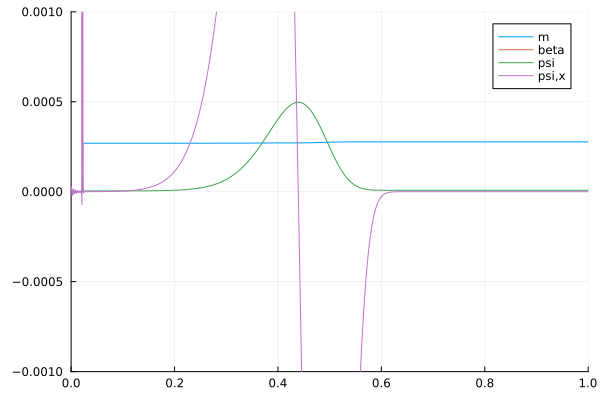

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/changing-grid/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/changing-grid/anim_res1.gif")
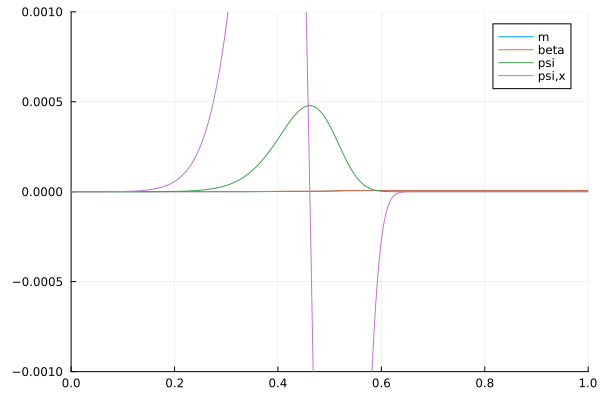

In [151]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:1:45#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    #plot!(X1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.1,0.1], xlim=[0, 0.1]) |> display 
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"],ylim=[-0.001,0.001], xlim=[0, 1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 10)

In [98]:
update_grid(state_array[:,:],[0.0 dt],1);
epsilon(dt,dx)

LoadError: UndefVarError: epsilon not defined

In [190]:
x_func=Spline1D(state_array[4:L-3,5],initX1)
x_func(0) #this works better
ori=find_origin(state_array[:,5]);
#rk4 will be on x from x=0 to x_func(state_array[ori,5])


LoadError: Error on entry, no approximation returned. The following conditions
must hold:
1<=k<=5
x[1] < x[2] < ... < x[end]
w[i] > 0.0 for all i

Additionally, if spline knots are given:
length(xknots) <= length(x) + k + 1
x[1] < xknots[1] < xknots[k+2] < ... < xknots[end] < x[end]
The schoenberg-whitney conditions: there must be a subset of data points
xx[j] such that t[j] < xx[j] < t[j+k+1] for j=1,2,...,n-k-1

In [191]:
y0=[0 0 0]
auxX=initX[4:ori]
#aux_state_array[1:2,1:3] = n_rk4wrapper(RHS,y0,auxX,t,funcs)

Float64[]

In [192]:
initX[ori]

LoadError: ArgumentError: invalid index: 0.0 of type Float64

In [117]:
der_grid(state_array[:,5])
scatter(initX1,state_array[4:L-3,5],xlim=[-0.1,0.1])
aa=Spline1D(initX1,state_array[4:L-3,5])
aa(0) #this works better

-0.17635822570890156

In [286]:
der_grid(state_array[:,5])
scatter(state_array[4:L-3,5], initX1,xlim=[-0.1,0.1])
aa=Spline1D(state_array[4:L-3,5], initX1)
roots(aa)

1-element Vector{Float64}:
 -0.17635822570890153

In [341]:
xtilde_func=Spline1D(initX1,state_array[4:L-3,5]);
xtilde_func(0)
X=state_array[:,5]
ori=find_origin(X)
auxX=vcat(xtilde_func(0),X[ori:L-3]);

In [161]:
derpsi_func = Spline1D(X[ori:L-3],state_array[ori:L-3,4],k=4)#new
dergrid_func=der_grid(X)
funcs=[derpsi_func dergrid_func];

In [162]:
y0=[0 0 0]
state_array[ori-1:L-3,5]=auxX
state_array[ori-1:L-3,1:3] = n_rk4wrapper(RHS,y0,auxX,0,funcs)#*dxtilde/dx = 1!!!??aqui

1002×3 Matrix{Float64}:
 0.0          0.0           0.0
 0.0          0.0           5.3865e-48
 1.27058e-23  1.49447e-20   4.40117e-14
 3.35876e-22  2.08883e-19   3.58695e-13
 2.61485e-21  1.08216e-18   1.23331e-12
 1.14703e-20  3.55018e-18   2.97827e-12
 3.65318e-20  9.02145e-18   5.92618e-12
 9.493e-20    1.94859e-17   1.04329e-11
 2.14315e-19  3.76135e-17   1.68786e-11
 4.36473e-19  6.68647e-17   2.56691e-11
 8.21626e-19  1.11613e-16   3.72366e-11
 1.4535e-18   1.7728e-16    5.20414e-11
 2.44527e-18  2.70491e-16   7.05731e-11
 ⋮                         
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-18
 0.000659922  0.0007499    -7.67446e-

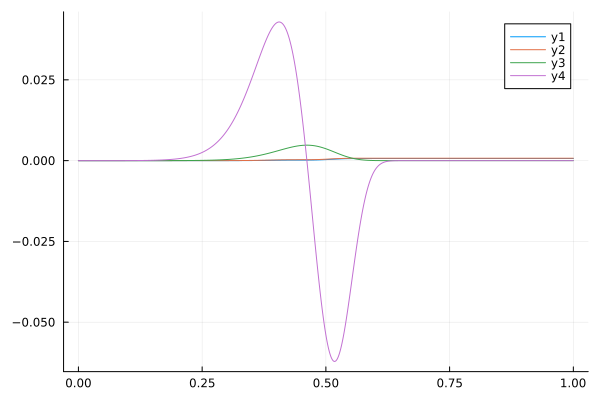

In [164]:
plot(X[ori:L-3], state_array[ori:L-3,1:4])